<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Flight Price Prediction</strong></p>

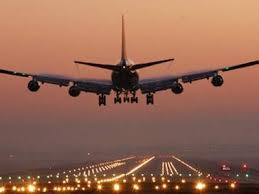

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')


# Importing dataset
1.Since data is in form of excel file we have to use pandas read_excel to load the data.   
2.After loading it is important to check null values in a column or a row           
3.If it is present then following can be done,                                                                                   
*       Filling NaN values with mean, median and mode using fillna() method                                                           
*       If Less missing values, we can drop it as well           

In [2]:
pip install openpyxl

In [3]:
#importing data
df=pd.read_excel('/kaggle/input/flight-fare-prediction-mh/Data_Train.xlsx')
df.head()

In [4]:
df.info()   #information about the data

In [5]:
#describe about the data
df.describe()

In [6]:
df.shape

In [7]:
#finding the null values
df.isnull().sum()

In [8]:
import missingno as msno
msno.bar(df)
plt.show

### **We observe 2 missing values,I can directly drop these,as these are very less.**

In [9]:
#drop the nullvalues
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

<a id = '5.5'></a>
<p style = "font-size : 25px; color : 'blue' ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>Data Cleaning</strong></p>

In [11]:
df.dtypes # datatypes

#### The datatypes of Date_of_journey,Arrival_Time and Dep_Time is object.So,firstly we convert it into date and time for proper predicion.

**dt.day method will extract only day of that date                           
dt.month method will extract only month of that date**

In [12]:
def change_into_datetime(col):
    df[col]=pd.to_datetime(df[col])

In [13]:
df.columns

In [14]:
for i in ['Date_of_Journey','Dep_Time', 'Arrival_Time']:
    change_into_datetime(i)

In [15]:
df.dtypes

##### Now ,we extract day and month from Date_of_journey and stored in 2 other columns.
##### Then there will be no use of 'Date_of_Journey' column,so we drop it.

In [16]:
df['journey_day']=df['Date_of_Journey'].dt.day
df['journey_month']=df['Date_of_Journey'].dt.month


In [17]:
df.head(10)

In [18]:
df.drop('Date_of_Journey', axis=1, inplace=True)

##### From Arrival_time and Dept_time features,we extract hour and minutes and stored in new columns and drop these columns

In [19]:
# function for extracting hour and minutes
def extract_hour(data,col):
    data[col+'_hour']=data[col].dt.hour
    
def extract_min(data,col):
    data[col+'_min']=data[col].dt.minute
    

def drop_col(data,col):
    data.drop(col,axis=1,inplace=True)

In [20]:
#call the function
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time
extract_hour(df,'Dep_Time')

#extracting minutes
extract_min(df,'Dep_Time')

#drop the column
drop_col(df,'Dep_Time')

In [21]:
#extracting hour
extract_hour(df,'Arrival_Time')

#extracting min
extract_min(df,'Arrival_Time')


#drop the column
drop_col(df,'Arrival_Time')

In [22]:
df.head(10)

##### Lets Apply pre-processing on duration column,Separate Duration hours and minute from duration

In [23]:
duration=list(df['Duration'])
for i in range(len(duration)):
    if len(duration[i].split(' '))==2:
        pass
    else:
        if 'h' in duration[i]: # Check if duration contains only hour
             duration[i]=duration[i] + ' 0m' # Adds 0 minute
        else:
             duration[i]='0h '+ duration[i]

In [24]:
df['Duration']=duration

In [25]:
df.head()

In [26]:
def hour(x):
    return x.split(' ')[0][0:-1]

def minutes(x):
    return x.split(' ')[1][0:-1]



In [27]:
df['dur_hour']=df['Duration'].apply(hour)

In [28]:
df['dur_min']=df['Duration'].apply(minutes)

In [29]:
df.head(10)

In [30]:
drop_col(df,'Duration')

In [31]:
df.dtypes

In [32]:
df['dur_hour'] = df['dur_hour'].astype(int)
df['dur_min'] = df['dur_min'].astype(int)

In [33]:
df.dtypes

#### Finding the categorical value

In [34]:
column=[column for column in df.columns if df[column].dtype=='object']
column

#### Finding the cntinuous value

In [35]:
continuous_col =[column for column in df.columns if df[column].dtype!='object']
continuous_col

# Handling categorical data




### We are using two main Encoding Techniques to covert Categorical data into some numerical format

#### Nominal data -- Data that are not in any order -->one hot encoding
#### ordinal data -- Data are in order --> labelEncoder

In [36]:
categorical = df[column]

In [37]:
categorical.head()

In [38]:
categorical['Airline'].value_counts()

## Airline vs Price Analysis

In [39]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Airline',y='Price',data=df.sort_values('Price',ascending=False))


### From graph we can see that Jet Airways Business have the highest Price., Apart from the first Airline almost all are having similar median

#### Perform Total_Stops vs Price Analysis

In [40]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Total_Stops',y='Price',data=df.sort_values('Price',ascending=False))

In [41]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding
Airline=pd.get_dummies(categorical['Airline'],drop_first=True)

In [42]:
Airline.head()

In [43]:
categorical['Source'].value_counts()

In [44]:
#Source vs Price

plt.figure(figsize=(15,15))
sns.catplot(x='Source',y='Price',data=df.sort_values('Price',ascending=False),kind='boxen')

In [45]:
#encoding of source column
source=pd.get_dummies(categorical['Source'],drop_first=True)
source.head()

In [46]:
categorical['Destination'].value_counts()

In [47]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Destination',y='Price',data=df.sort_values('Price',ascending=False))

In [48]:
#encoding of destination column
destination=pd.get_dummies(categorical['Destination'],drop_first=True)
destination.head()

In [49]:
# now work on route column
categorical['Route'].value_counts()


In [50]:
categorical['Route1']=categorical['Route'].str.split('→').str[0]
categorical['Route2']=categorical['Route'].str.split('→').str[1]
categorical['Route3']=categorical['Route'].str.split('→').str[2]
categorical['Route4']=categorical['Route'].str.split('→').str[3]
categorical['Route5']=categorical['Route'].str.split('→').str[4]

In [51]:
categorical.head()

In [52]:
drop_col(categorical,'Route')

In [53]:
categorical.isnull().sum()

In [54]:
categorical.columns

In [55]:
for i in ['Route3', 'Route4', 'Route5']:
    categorical[i].fillna('None',inplace=True)

In [56]:
categorical.isnull().sum()

In [57]:
for i in categorical.columns:
    print('{} has total {} categories'.format(i,len(categorical[i].value_counts())))

In [58]:
df.plot.hexbin(x='Arrival_Time_hour',y='Price',gridsize=15)

In [59]:
# Applying label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [60]:
for i in ['Route1', 'Route2', 'Route3', 'Route4', 'Route5']:
    categorical[i]=encoder.fit_transform(categorical[i])

In [61]:
categorical.head()

In [62]:
drop_col(categorical,'Additional_Info')

In [63]:
categorical['Total_Stops'].unique()

In [64]:
# encoding Total stops
dict={'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}
categorical['Total_Stops']=categorical['Total_Stops'].map(dict)

In [65]:
categorical['Total_Stops']

In [66]:
drop_col(categorical,'Source')
drop_col(categorical,'Destination')
drop_col(categorical,'Airline')

<a id = '5.5'></a>
<p style = "font-size : 25px; color : #34656d ; font-family : 'Comic Sans MS'; text-align : center; background-color : #fbc6a4; border-radius: 5px 5px;"><strong>After all preprocessing, Our data is ready for the modeling</strong></p> 

In [67]:
final_df=pd.concat([categorical,Airline,source,destination,df[continuous_col]],axis=1)

In [68]:
final_df.head()

In [69]:
pd.set_option('display.max_columns',33)
final_df.head()

## Check For Outliers 


In [70]:
def plot(data,col):
    fig,(ax1,ax2)=plt.subplots(2,1)
    sns.distplot(data[col],ax=ax1)
    sns.boxplot(data[col],ax=ax2)

In [71]:
plot(final_df,'Price')

###  Handling outliers:
#### As there is some outliers in price feature,so we replace it  with median.

In [72]:
final_df['Price']=np.where(final_df['Price']>=40000,final_df['Price'].median(),final_df['Price'])

In [73]:
plot(final_df,'Price')

### Seprate the dataset in X and Y columns

In [74]:
X=final_df.drop('Price',axis=1)
y=df['Price']

# Feature Selection 
It is about finding the best feature and having good relation with independent variable                                  
Issue of dimensionality reduction reduces.

For this we use mutual_info_classif

In [75]:
from sklearn.feature_selection import mutual_info_classif


In [76]:
mutual_info_classif(X,y)

In [77]:
imp = pd.DataFrame(mutual_info_classif(X,y),index=X.columns)
imp

In [78]:
imp.columns=['importance']
imp.sort_values(by='importance',ascending=False)

As we can see from the table, there are several features that have approx 0 value,so we should remove it after authorizing it.But for now,we are not removing it.

# Models

In [79]:
# spiliting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=123)

In [80]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
def predict(ml_model):
    print('Model is: {}'.format(ml_model))
    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))
    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')
    r2score=r2_score(y_test,predictions) 
    print("r2 score is: {}".format(r2score))
          
    print('MAE:{}'.format(mean_absolute_error(y_test,predictions)))
    print('MSE:{}'.format(mean_squared_error(y_test,predictions)))
    print('RMSE:{}'.format(np.sqrt(mean_squared_error(y_test,predictions))))
     
    sns.distplot(y_test-predictions)      
          

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor


In [82]:

predict(RandomForestRegressor())

From the graph,it is clear that we predicted 84% correctly.

In [84]:
predict(KNeighborsRegressor())


In [85]:
predict(DecisionTreeRegressor())

In [86]:
from sklearn.svm import SVR
predict(SVR())

In [87]:
predict(GradientBoostingRegressor())

# Hypertunning the model

In [88]:
from sklearn.model_selection import RandomizedSearchCV


In [89]:
random_grid = {
    'n_estimators' : [100, 120, 150, 180, 200,220],
    'max_features':['auto','sqrt'],
    'max_depth':[5,10,15,20],
    }

In [90]:
rf=RandomForestRegressor()
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,cv=3,verbose=2,n_jobs=-1,)

rf_random.fit(X_train,y_train)

# best parameter
rf_random.best_params_

In [91]:
# best parameter
rf_random.best_params_

In [92]:
#predicting the values
prediction = rf_random.predict(X_test)

#distribution plot between actual value and predicted value
sns.displot(y_test-prediction)

In [93]:
r2_score(y_test,prediction)